You are given a dataset which consists of the petal and sepal measurements of iris flowers. The problem is to find the category of flower (Iris Setosa, Iris Virginica, Iris Versicolor) given the measurements of a particular flower. Create models using KNN and Naïve Bayes and find the best of the two models used. Use python to prepare the data and create the models and cross-validate the dataset. Please make sure you also use appropriate performance measures, error values, bias and variance to come to conclusion of the best dataset

**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

**Read CSV file into a DataFrame**

In [2]:
data = pd.read_csv("../input/iris.csv", 
                   names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])

**Display the first five rows of the dataset**

In [3]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Summary of the dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null object
Petal Length    150 non-null object
Petal Width     150 non-null object
Species         150 non-null object
dtypes: float64(1), object(4)
memory usage: 6.0+ KB


**Convert the DatFrame objects into a integer/float**

In [5]:
features = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for feature in features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

**Detect any missing values in the data**

In [6]:
data[features].isnull().sum()

Sepal Length    0
Sepal Width     2
Petal Length    9
Petal Width     8
dtype: int64

**Replace missing values with a mean of columns/features**

In [7]:
for feature in features:
    data[feature] = data[feature].fillna(data[feature].mean())

# check if there are still any missing values
data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

**Descriptive statistics**

In [8]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.055405,3.754610,1.197887
std,0.828066,0.433386,1.708977,0.749180
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Plot pairwise relationships in a dataset**

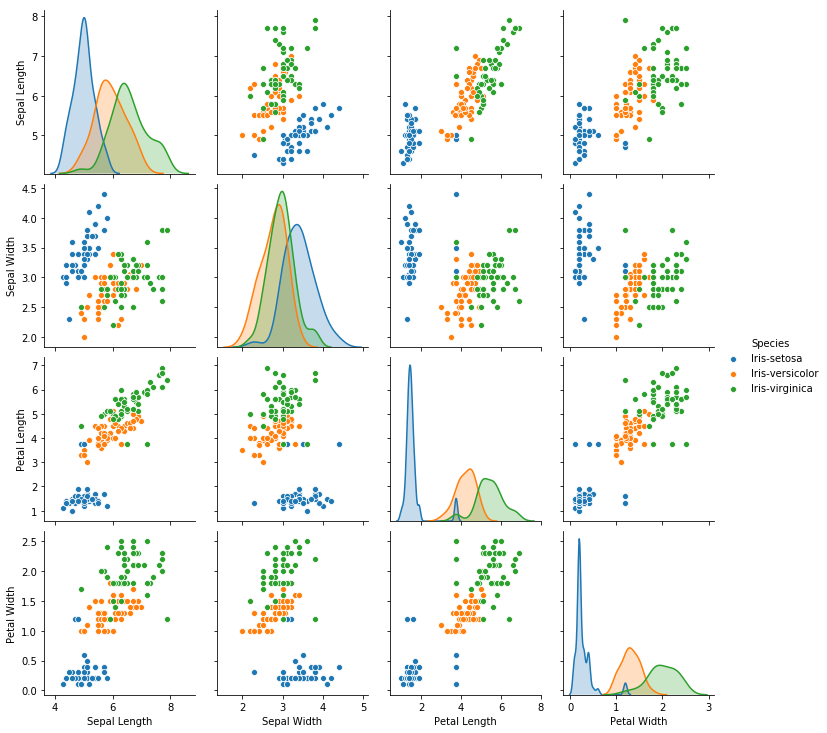

In [9]:
sns.pairplot(data, hue="Species")

**Output class counts**

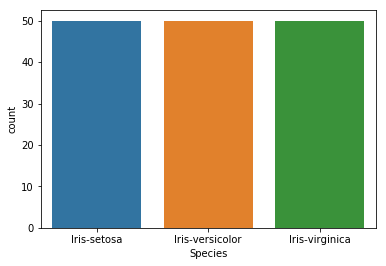

In [10]:
sns.countplot(data['Species'])

**Principal Component Analysis applied to the Iris dataset**

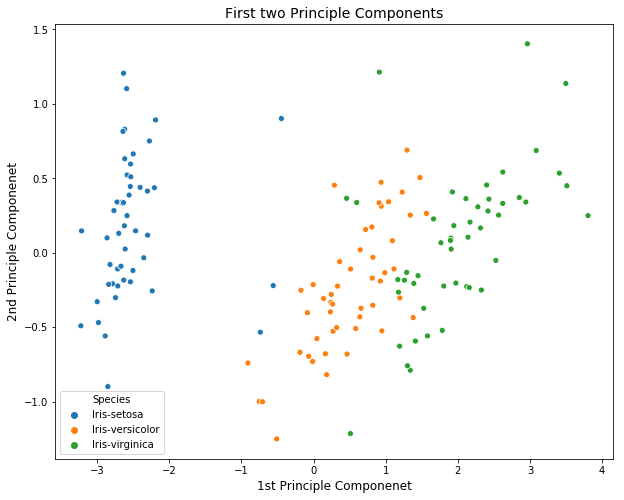

In [11]:
x_reduced = PCA(n_components=2).fit_transform(data[features])

plt.figure(figsize=(10,8))
sns.scatterplot(x_reduced[:,0], x_reduced[:,1], hue=data['Species'])
plt.xlabel('1st Principle Componenet', fontsize=12)
plt.ylabel('2nd Principle Componenet', fontsize=12)
plt.title('First two Principle Components', fontsize=14)
plt.show()

**Encode output labels with numeric values**

In [12]:
#Input
X = data[features]
#Encode output
le = LabelEncoder()
y = le.fit_transform(data['Species'])

**Split the data into random train and test subsets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print('Training dataset samples : %d' %(X_train.shape[0]))
print('Testing dataset samples  : %d' %(X_test.shape[0]))

Training dataset samples : 120
Testing dataset samples  : 30


**Evaluating KNeighbors Classifier on set of different number of neighbors **

In [14]:
neighbors = [1, 2, 3, 4, 5, 6, 7]

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy for n_neighbors=%d : %0.2f" %(n, accuracy_score(y_test, y_pred)))

Accuracy for n_neighbors=1 : 1.00
Accuracy for n_neighbors=2 : 0.97
Accuracy for n_neighbors=3 : 0.97
Accuracy for n_neighbors=4 : 0.97
Accuracy for n_neighbors=5 : 0.97
Accuracy for n_neighbors=6 : 0.97
Accuracy for n_neighbors=7 : 0.93


**Applying and evaluating Gaussian Naive Bayes**

In [15]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy score for Naive Baye : %0.2f" %(accuracy_score(y_test, y_pred)))

Accuracy score for Naive Baye : 0.93
